In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle

from sklearn.model_selection import train_test_split


In [2]:

pickle_in = open("X_large.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("y_large.pickle","rb")
y = pickle.load(pickle_in)


# pickle_in = open("/content/drive/MyDrive/Pickle Files for Deep learning/X.pickle","rb")
# X = pickle.load(pickle_in)


# pickle_in = open("/content/drive/MyDrive/Pickle Files for Deep learning/y.pickle","rb")
# y = pickle.load(pickle_in)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), y, test_size=0.1, random_state=None)

In [4]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(.5))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(20)) #20 for the 20 bird species

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0

In [8]:
y_train = np.array(y_train)
y_test = np.array(y_test)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
4403/4403 [==============================] - 198s 45ms/step - loss: 1.6758 - accuracy: 0.4816 - val_loss: 1.0588 - val_accuracy: 0.6734
Epoch 2/50
4403/4403 [==============================] - 198s 45ms/step - loss: 1.0448 - accuracy: 0.6791 - val_loss: 0.8782 - val_accuracy: 0.7301
Epoch 3/50
4403/4403 [==============================] - 197s 45ms/step - loss: 0.8860 - accuracy: 0.7306 - val_loss: 0.8713 - val_accuracy: 0.7402
Epoch 4/50
4403/4403 [==============================] - 192s 44ms/step - loss: 0.7955 - accuracy: 0.7595 - val_loss: 0.7337 - val_accuracy: 0.7783
Epoch 5/50
4403/4403 [==============================] - 197s 45ms/step - loss: 0.7346 - accuracy: 0.7796 - val_loss: 0.5929 - val_accuracy: 0.8223
Epoch 6/50
4403/4403 [==============================] - 193s 44ms/step - loss: 0.6965 - accuracy: 0.7934 - val_loss: 0.6206 - val_accuracy: 0.8142
Epoch 7/50
4403/4403 [==============================] - 198s 45ms/step - loss: 0.6674 - accuracy: 0.8026 - val_loss: 0

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(test_acc)

490/490 - 5s - loss: 0.4826 - accuracy: 0.8775
0.8774675726890564


490/490 - 5s - loss: 0.4826 - accuracy: 0.8775


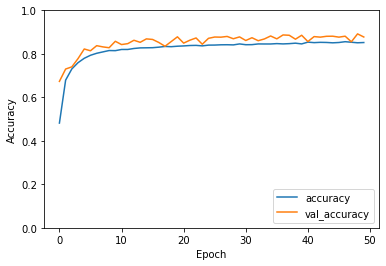

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [11]:

model.save('saved_model/my_model')



INFO:tensorflow:Assets written to: saved_model/my_model\assets
